<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2021/blob/main/01_Intro_to_NN_Pytorch/Week1_Intro_to_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.buymeacoffee.com/sheikmohdimran" target="_blank"><img src="https://cdn.buymeacoffee.com/buttons/default-orange.png" alt="Buy Me A Coffee" height="30" width="120"></a>

You can support my work by buying me a coffee [here](https://www.buymeacoffee.com/sheikmohdimran).

In [ ]:
!pip install fastai==2.4.1 -qqq
!pip install wandb -qqq
!pip install kaggle -qqq

In [ ]:
#@title Download Dataset
!echo '{"username":"imrandude","key":"<kaggle_key>"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d barelydedicated/bank-customer-churn-modeling
!unzip -q bank-customer-churn-modeling.zip

#Neural Network basics

## Given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks?
The case study is from an open source dataset from Kaggle.

Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
ds = pd.read_csv("Churn_Modelling.csv")

In [ ]:
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
ds['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### RowNumber, CustomerId, and Surname are unique hence we are dropping it

In [ ]:
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Distinguish the feature and target set

In [ ]:
X = ds.iloc[:,0:10].values # Credit Score through Estimated Salary
y = ds.iloc[:,10].values # Exited

### Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany. This will convert those strings into scalar values for analysis.

In [ ]:
print(X[:8,1], '... will now become: ')

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


### We will do the same thing for gender. this will be binary in this dataset

In [ ]:
print(X[:6,2], '... will now become: ')

label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


### The Problem here is that we are treating the countries as one variable with ordinal values (0 < 1 < 2). Therefore, one way to get rid of that problem is to split the countries into respective dimensions. Gender does not need this as it is binary

### Converting the string features into their own dimensions. Gender doesn't matter here because its binary

In [ ]:
from sklearn.compose import ColumnTransformer 
country = ColumnTransformer([("transform_country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = country.fit_transform(X)#.toarray()

In [ ]:
X.shape

(10000, 12)

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# A 0 on two countries means that the country has to be the one variable which wasn't included 
# This will save us from the problem of using too many dimensions
X = X[:,1:] # Got rid of Spain as a dimension.

### Divide the data set into Train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Normalize the train and test data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test.shape

(2000, 11)

### Initialize & build the model

In [ ]:
import sklearn.metrics as skm
import numpy as np
import torch
from torch import nn
from torch import sigmoid
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from fastai.tabular.all import *
from fastai.callback.wandb import *
import wandb

In [ ]:
!wandb login <wandb_api_key>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
train_loader=DataLoader(TensorDataset(torch.from_numpy(X_train.astype(np.float32)),
                                        torch.from_numpy(y_train.astype(np.float32))), 
                          batch_size=16)
test_loader=DataLoader(TensorDataset(torch.from_numpy(X_test.astype(np.float32)),
                                        torch.from_numpy(y_test.astype(np.float32))), 
                          batch_size=64)

In [ ]:
hidden = 6
input_dim = 11
model=nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_dim, hidden),
        nn.ReLU(),
        nn.Linear(hidden, hidden),
        nn.Sigmoid(),
        nn.Linear(hidden, 1),
        nn.Sigmoid()
    )

In [ ]:


def _accumulate(self, learn):
    pred = to_detach(torch.round(learn.pred))
    targ = to_detach(learn.y)
    self.preds.append(pred)
    self.targs.append(targ)

AccumMetric.accumulate = _accumulate

def BinAccu():
    return skm_to_fastai(skm.accuracy_score)

## Training the model

In [ ]:
wandb.init(name='Intro-to-NN-1', project='pytorch-basics',entity='sheikmohdimran')

wandb: Currently logged in as: sheikmohdimran (use `wandb login --relogin` to force relogin)


In [ ]:
data = DataLoaders(train_loader, test_loader)

learn = Learner(data, 
                model, 
                loss_func=BCELossFlat(),                               #https://docs.fast.ai/losses.html#BCELossFlat
                opt_func=partial(OptimWrapper, opt=torch.optim.Adam),  #https://docs.fast.ai/migrating_pytorch_verbose.html#Optimizer
                metrics=BinAccu(),                                     #https://lschmiddey.github.io/fastpages_/2020/10/01/Tabular-Data-with-custom-metric.html
                cbs=WandbCallback())                                   #https://docs.fast.ai/callback.wandb.html

In [ ]:
learn.fit(20)

Could not gather input dimensions
WandbCallback requires use of "SaveModelCallback" to log best model
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> 'TensorDataset' object has no attribute 'items'


epoch,train_loss,valid_loss,accuracy_score,time
0,0.473573,0.461772,0.797500,00:02
1,0.439052,0.427519,0.797500,00:02
2,0.424387,0.413846,0.807500,00:02
3,0.413220,0.403001,0.823500,00:02
4,0.400715,0.390259,0.834500,00:02
5,0.389087,0.378317,0.846500,00:02
6,0.379213,0.368800,0.856000,00:02
7,0.371727,0.361920,0.858500,00:03
8,0.366693,0.357786,0.856500,00:02
9,0.363363,0.354900,0.857500,00:02


In [ ]:
learn.save('myModel', with_opt=False)

Path('models/myModel.pth')

### Optimize the model
Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

#### Number of Layers:
We will keep it similar to the above model so that we can compare the accuracy.
1 hidden layer.

#### Activation:
input layer: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ

output layer: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

#### Type of optimization / backpropagation technique to use: 
We will use Adam. Adam is a very efficient variation of Stochastic Gradient Descent. For Adam and its variant, learning rate or the decay rate does not really matter too much.

#### Learning Rate:
default learning rate 0.001.

#### Number of Neurons in a layer:
We will keep it 6 as per our initial calculation above.

#### Weight sharing / kernel_initializer: 
Normal distribution with which we randomly initialize weights for the nodes in this layer.

#### Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

### Rebuilding the model using these optimised parameters

In [ ]:
import base64
encoded = base64.b64encode(open("metrics.png", "rb").read())
encoded

### Sample output from Weights & Biases

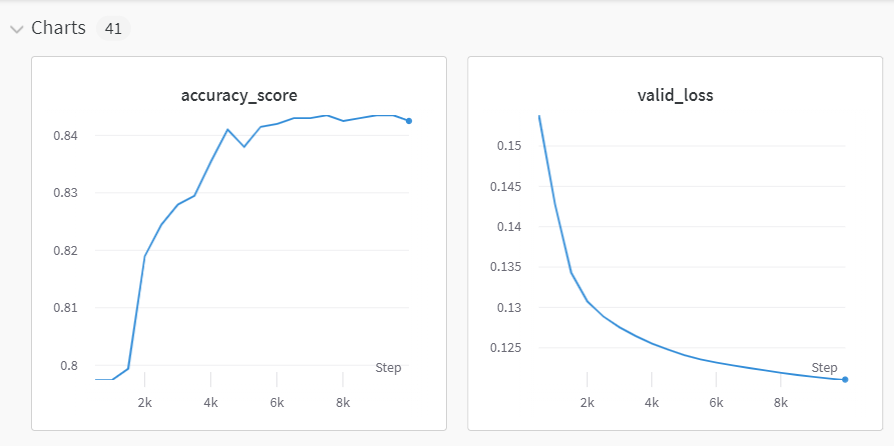

## Inference

In [ ]:
hidden = 6
input_dim = 11
model=nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_dim, hidden),
        nn.ReLU(),
        nn.Linear(hidden, hidden),
        nn.Sigmoid(),
        nn.Linear(hidden, 1),
        nn.Sigmoid()
    )

In [ ]:
net_dict = torch.load('models/myModel.pth') 
model.load_state_dict(net_dict);
device = torch.device("cuda:0")

In [ ]:
def predict(model, dataloader, n_class, device):
    model.eval()
    model.to(device)
    preds = np.zeros([0, n_class])
    for data, _ in dataloader:
        data = data.to(device)
        with torch.no_grad():
            y_pred = model(data).detach()
        y_pred = y_pred.cpu().numpy()
        preds = np.concatenate([preds, y_pred])
    return preds

In [ ]:
test_preds = predict(model, test_loader, n_class=1, device=device)
preds=(test_preds>0.5).astype(float)
test_acc = skm.accuracy_score(y_test, preds)
print(f'test acc: {test_acc}')

test acc: 0.859
